In [62]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [63]:
train = pd.read_csv('F:\\Training\\Python Projects\\train.csv')
test = pd.read_csv('F:\\Training\\Python Projects\\test.csv')

In [64]:
train.shape,test.shape

((12980, 12), (4399, 11))

There are 12 columns in train dataset, whereas 11 in the test dataset. The missing column in the test dataset is the target variable and we will train our model to predict that variable.

In [65]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [66]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [67]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [68]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

We can infer that "count" is our target variable as it is missing from the test dataset.

In [69]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [70]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


Let's look at the distribution of our target variable count

<AxesSubplot:xlabel='count', ylabel='Density'>

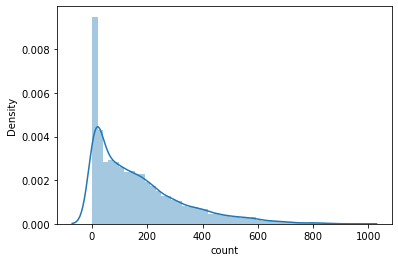

In [71]:
sn.distplot(train['count'])

We can see that the distribution is skewed towards right so we can take log

<AxesSubplot:xlabel='count', ylabel='Density'>

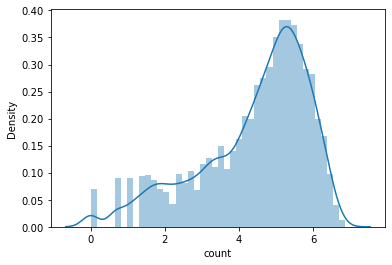

In [72]:
sn.distplot(np.log(train['count']))

Now the distribution is less skewed. Now we can do univariate analysis of the individual variables which are affecting our target variable.

<AxesSubplot:xlabel='registered', ylabel='Density'>

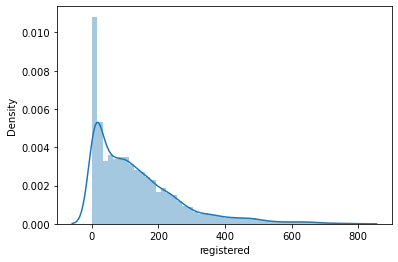

In [73]:
sn.distplot(train['registered'])

We can see that most of the registered rentels lied in the range of 0 to 200.

Now let's see the correlation between the valiables so that we can get overview that which variables are affecting our target variable.

<AxesSubplot:>

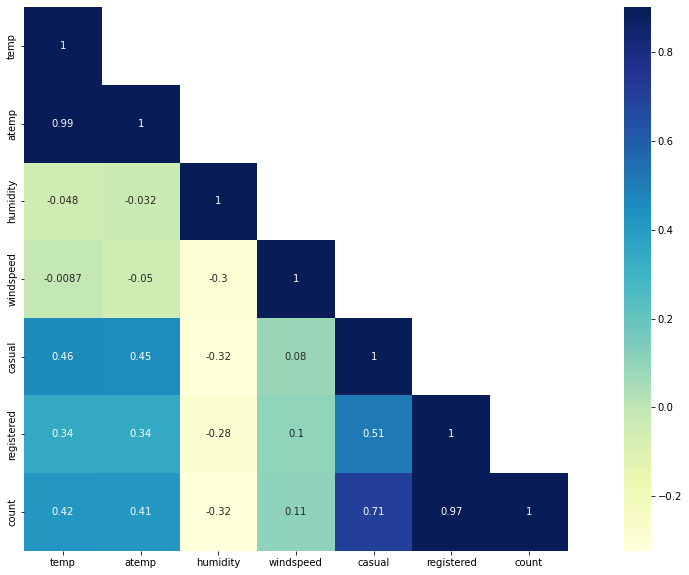

In [74]:
corr = train[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

From the above correlation data we can say the following inferences:

1. temp and humidity have positive and negative correlation with count respectively. And the correlation b/w them is not
   very prominent still count has a little dependency on them.
 
2. Windspeed will not be useful feature and it is visible from it correlation value with "count".

3. Since "atemp" and "temp" has got strong correlation with each other,any one of the variable has to be dropped during 
   model building since they will exhibit multicollinearity in the data.

In [75]:
# checking the missing values in the train data

train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the train dataset. Let's look for the missing values in the test dataset.

In [76]:
# checking the missing values in the test data

test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

There are no missing values in the test dataset as well. We can now move further and build our first model. Before that let's first extract some new features using the datetime variable. We can extract the date, hour, month.

In [77]:
# extracting date, hour and month from the datetime

from pandas import to_datetime

In [78]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set.

In [79]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [80]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

  We will drop the datetime, date variable as we have already extracted features from these variables.
  
  We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [81]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
# initialize the linear regression model
lModel = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [84]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [85]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [86]:
# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model.

In [87]:
# making prediction on validation set
prediction = lModel.predict(X_val)

In [88]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

Let's now calculate the rmsle value of the predictions

In [89]:
rmsle(y_val,prediction)

0.8875379204281787

In [90]:
test_prediction = lModel.predict(test)

We got a rmsle value of 0.8875 on the validation set.

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth = 25)

Let's fit the decision tree model now.

In [111]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

Now let's make prediction on the validation set using the trained decision tree model.

In [112]:
predict = dt_reg.predict(X_val)

In [113]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.03707969928931137

The rmsle value has decreased to 0.037. This is a decent score. Let's now make predictions for the test dataset

In [114]:
test_prediction = dt_reg.predict(test)

These are the log values and we have to convert them back to the original scale.

In [115]:
final_prediction = np.exp(test_prediction)

Finally, we will save these predictions into a csv file.

In [116]:
submission = pd.DataFrame()

In [117]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [118]:
submission.to_csv('major.csv', header=True, index=False)